# Import libraries

In [148]:
from PIL import Image
import numpy as np
from mtcnn.mtcnn import MTCNN
import os
from matplotlib import pyplot
import tensorflow as tf
import cv2
import tensorflow as tf   
tf.get_logger().setLevel('ERROR')

# Extract a face from the image

In [149]:
def extract_face_mtcnn(filepath):
    required_size = (160, 160)
    image = Image.open(filepath)
    image = image.convert('RGB')
    image_pixels = np.asarray(image)
    detector = MTCNN()
    result = detector.detect_faces(image_pixels)
    x1, y1, width, height = result[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = image_pixels[y1:y2, x1:x2]
    
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

# Loading images

ben.jpg:  1 (160, 160, 3)
FB_IMG_15887865661953252.jpg:  2 (160, 160, 3)
FB_IMG_15887865743369205.jpg:  3 (160, 160, 3)
IMG_20200319_191417_128.jpg:  4 (160, 160, 3)
IMG_20200319_191438_356.jpg:  5 (160, 160, 3)
IMG_20200506_203820_898.jpg:  6 (160, 160, 3)
IMG_20200506_204256_646.jpg:  7 (160, 160, 3)
IMG_20200506_204331_377.jpg:  8 (160, 160, 3)


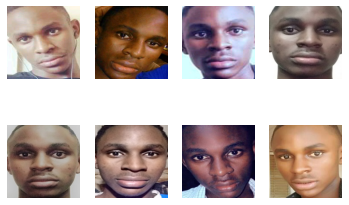

In [153]:
folder = "../data/new-data/Ben Wycliff Mugalu/"
i = 1
for filename in os.listdir(folder):
    file_path = folder + filename

    face = extract_face_mtcnn(file_path)
    print(filename + ": ",i, face.shape)
    
    pyplot.subplot(2, 4, i)
    pyplot.axis("off")
    pyplot.imshow(face)
    i += 1
pyplot.show()

# Extract face haarcascade

In [154]:
def extract_face_haarcascade(filepath):
    required_size = (160, 160)
    face_cascade = cv2.CascadeClassifier('../haarcascade_frontalface_default.xml')
    
    print(filepath)
    img = cv2.imread(filepath)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    pixels = np.asarray(image)
    
    face = face_cascade.detectMultiScale(image, 1.1, 4)
    if len(face) == 0:
        return 'no face'
    print(face)
    face = face[0]
    x1, y1, width, height = face
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1+height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

# loading faces from haarcascade

../data/new-data/Ben Wycliff Mugalu/ben.jpg
../data/new-data/Ben Wycliff Mugalu/FB_IMG_15887865661953252.jpg
../data/new-data/Ben Wycliff Mugalu/FB_IMG_15887865743369205.jpg
[[347 103 131 131]]
filename:  1 (160, 160)
../data/new-data/Ben Wycliff Mugalu/IMG_20200319_191417_128.jpg


/home/ben/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


[[255   9 211 211]]
filename:  2 (160, 160)
../data/new-data/Ben Wycliff Mugalu/IMG_20200319_191438_356.jpg
[[180  90 205 205]]
filename:  3 (160, 160)
../data/new-data/Ben Wycliff Mugalu/IMG_20200506_203820_898.jpg
[[ 56 131 222 222]]
filename:  4 (160, 160)
../data/new-data/Ben Wycliff Mugalu/IMG_20200506_204256_646.jpg
[[263 191 238 238]]
filename:  5 (160, 160)
../data/new-data/Ben Wycliff Mugalu/IMG_20200506_204331_377.jpg
[[272  99 188 188]]
filename:  6 (160, 160)


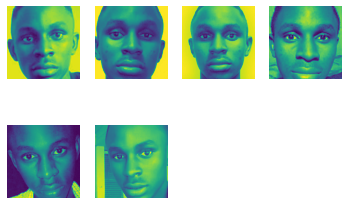

In [155]:
folder = "../data/new-data/Ben Wycliff Mugalu/"
i = 1
for filename in os.listdir(folder):
    file_path = folder + filename

    face = extract_face_haarcascade(file_path)
    if face == "no face":
        continue
    print("filename: ",i, face.shape)
    
    pyplot.subplot(2, 4, i)
    pyplot.axis("off")
    pyplot.imshow(face)
    i += 1
pyplot.show()